MAI643 - Artificial Intelligence in Medicine

Project Assignment 1 - Spring Semester 2024

Student Name:    
Christina Ioanna Saroglaki   
Jianlin Ye 

UCY Email:     
saroglaki.christina-ioanna@ucy.ac.cy    
jye00001@ucy.ac.cy 

### Import Libararies

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Overview

As per the authors, the chosen dataset focuses on indicators associated with the diagnosis of cervical cancer, encompassing various features such as demographic information, habits, and medical records​. In more detail, the data was gathered at 'Hospital Universitario de Caracas' in Venezuela from a total of 858 patients​.

C. J. Fernandes Kelwin and J. Fernandes, “Cervical cancer (Risk Factors),” UCI Machine 
Learning Repository. 2017.

In [95]:
risk_factor_df = pd.read_csv("risk_factors_cervical_cancer.csv")

print("----------------------------------- Information -----------------------------------")
risk_factor_df.info()

----------------------------------- Information -----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         85

Split dataset to features and target variables.

In [96]:
feature_df = risk_factor_df.iloc[:,:-4]
dep_df = risk_factor_df.iloc[:,-4:]

## Find Missing Values

In [97]:
# Function finding the unique values of each column in the dataframe
def find_unique_values_df(feat: pd.DataFrame):
    column_unique  = {}

    for col in list(feat):
        column_unique[str(col)] = feat[col].unique()

    return column_unique

In [98]:
print("----------------------------------- Unique Values -----------------------------------")    
# Unique Values
unique_vals = find_unique_values_df(risk_factor_df)

for col in unique_vals:
    print("\n{} : {}".format(col, unique_vals[col]))

    #Convert all columns to contain numerical values
    risk_factor_df[col] = risk_factor_df[col].apply(pd.to_numeric, errors="coerce")

----------------------------------- Unique Values -----------------------------------

Age : [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]

Number of sexual partners : ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']

First sexual intercourse : ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']

Num of pregnancies : ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']

Smokes : ['0.0' '1.0' '?']

Smokes (years) : ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']

Smokes (packs/year) : ['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.6' '19.0' '21.0' '0.32' '

----------------------------------- Missing Values -----------------------------------

NaN values found in the dataset.

Total NaN values in dataset: 3622/30888

Amount of NaN values per column
STDs: Time since first diagnosis : 787
STDs: Time since last diagnosis : 787
IUD : 117
IUD (years) : 117
Hormonal Contraceptives : 108
Hormonal Contraceptives (years) : 108
STDs : 105
STDs (number) : 105
STDs:condylomatosis : 105
STDs:cervical condylomatosis : 105
STDs:vaginal condylomatosis : 105
STDs:vulvo-perineal condylomatosis : 105
STDs:syphilis : 105
STDs:pelvic inflammatory disease : 105
STDs:genital herpes : 105
STDs:molluscum contagiosum : 105
STDs:AIDS : 105
STDs:HIV : 105
STDs:Hepatitis B : 105
STDs:HPV : 105
Num of pregnancies : 56
Number of sexual partners : 26
Smokes : 13
Smokes (years) : 13
Smokes (packs/year) : 13
First sexual intercourse : 7
Age : 0
STDs: Number of diagnosis : 0
Dx:Cancer : 0
Dx:CIN : 0
Dx:HPV : 0
Dx : 0
Hinselmann : 0
Schiller : 0
Citology : 0
Biopsy : 0

Tot

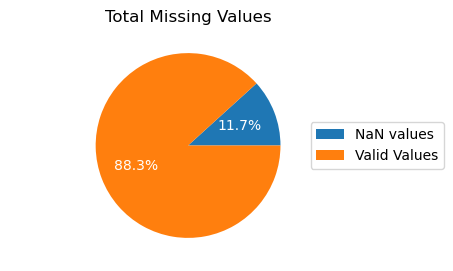

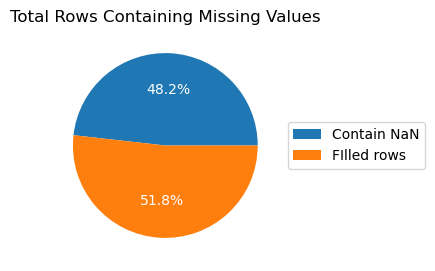

In [99]:
# NaN values
print("----------------------------------- Missing Values -----------------------------------")
nan_columns = {}
total_nan = 0
total_entries = len(risk_factor_df.axes[0]) * len(risk_factor_df.axes[1])

for col in risk_factor_df.columns:
    if risk_factor_df[col].isnull().any():
        nan_in_column = risk_factor_df[col].isna().sum()
        nan_columns[col] = nan_in_column
        total_nan += nan_in_column
    else:
        nan_columns[col] = 0

# Total NaN Values
if (total_nan == 0):
    print("\nNo NaN values in the dataset.")
else:
    print("\nNaN values found in the dataset.")
    nan_columns = sorted(nan_columns.items(), key=lambda item: item[1], reverse=True)

print("\nTotal NaN values in dataset: {}/{}".format(total_nan, total_entries))

print("\nAmount of NaN values per column")
for sort_col in nan_columns:
        print("{} : {}".format(sort_col[0], sort_col[1]))

# Rows containing NaN values
nan_rows = risk_factor_df.iloc[:,:-4].isna().any(axis=1).tolist().count(True)

print("\nTotal Rows containing NaN values in dataset: {}/{}".format(nan_rows, len(risk_factor_df)))

# Plots
total_labels = ["NaN values", "Valid Values"]
total_size = [total_nan, total_entries-total_nan]

row_labels = ["Contain NaN", "FIlled rows"]
row_size = [nan_rows, len(risk_factor_df)]

fig_1, ax_1 = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))
ax_1.pie(total_size, labels=total_labels, autopct='%1.1f%%', textprops=dict(color="w"))
ax_1.legend(loc= "center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax_1.set_title("Total Missing Values")

fig_2, ax_2 = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))
ax_2.pie(row_size, labels=row_labels, autopct='%1.1f%%', textprops=dict(color="w"))
ax_2.legend(loc= "center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax_2.set_title("Total Rows Containing Missing Values")

plt.show()

### Filling missing values (drop missing values will reduce the rows from 858 to 59)

In [100]:
# Fill missing values with mean
print("--------------------------- Filling Missing Values ---------------------------")
print("----------------------------------- BEFORE -----------------------------------")
print("Number of rows before filling missing values: ", len(risk_factor_df))

# Display the number of missing values before filling
print("\nNumber of missing values per column before filling:")
print(risk_factor_df.isnull().sum())

# Fill missing values with mean
risk_factor_df.fillna(risk_factor_df.mean(), inplace=True)

print("\n----------------------------------- AFTER -----------------------------------")
print("Number of rows after filling missing values: ", len(risk_factor_df))

# Display the number of missing values after filling
print("\nNumber of missing values per column after filling:")
print(risk_factor_df.isnull().sum())


--------------------------- Filling Missing Values ---------------------------
----------------------------------- BEFORE -----------------------------------
Number of rows before filling missing values:  858

Number of missing values per column before filling:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis           

### Remove missing values

In [101]:
# Removing missing data
print("------------------------------- Missing Values -------------------------------")
print("----------------------------------- BEFORE -----------------------------------")
print("Number of rows before: ", len(risk_factor_df))

# Drop rows with missing values
risk_factor_df.dropna(inplace=True)

print("----------------------------------- AFTER -----------------------------------")
print("Number of rows after: ", len(risk_factor_df))


------------------------------- Missing Values -------------------------------
----------------------------------- BEFORE -----------------------------------
Number of rows before:  858
----------------------------------- AFTER -----------------------------------
Number of rows after:  858


### Check for duplicate rows

In [102]:
# Check for duplicate rows
duplicate_rows = risk_factor_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"Found {num_duplicates} duplicate rows in the dataset.")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    duplicate_rows_df = risk_factor_df[duplicate_rows]
    print("\nDuplicate rows:")
    print(duplicate_rows_df)


Found 23 duplicate rows in the dataset.

Duplicate rows:
     Age  Number of sexual partners  First sexual intercourse  \
66    34                   3.000000                      19.0   
234   25                   2.527644                      18.0   
255   25                   2.000000                      18.0   
356   18                   1.000000                      17.0   
395   18                   1.000000                      18.0   
406   17                   1.000000                      17.0   
419   19                   4.000000                      14.0   
431   18                   1.000000                      14.0   
435   17                   2.000000                      15.0   
440   15                   1.000000                      14.0   
442   16                   1.000000                      15.0   
453   15                   1.000000                      15.0   
454   15                   1.000000                      14.0   
466   15                   1.0000

In [103]:
# Removing duplicate rows
print("----------------------------- Removing Duplicates ----------------------------")
print("----------------------------------- BEFORE -----------------------------------")
print("Number of rows before removing duplicates: ", len(risk_factor_df))

# Check for duplicate rows
duplicate_rows = risk_factor_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"Found {num_duplicates} duplicate rows in the dataset.")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    duplicate_rows_df = risk_factor_df[duplicate_rows]
    print("\nDuplicate rows:")
    print(duplicate_rows_df)

# Drop duplicate rows
risk_factor_df.drop_duplicates(inplace=True)

print("----------------------------------- AFTER -----------------------------------")
print("Number of rows after removing duplicates: ", len(risk_factor_df))


----------------------------- Removing Duplicates ----------------------------
----------------------------------- BEFORE -----------------------------------
Number of rows before removing duplicates:  858
Found 23 duplicate rows in the dataset.

Duplicate rows:
     Age  Number of sexual partners  First sexual intercourse  \
66    34                   3.000000                      19.0   
234   25                   2.527644                      18.0   
255   25                   2.000000                      18.0   
356   18                   1.000000                      17.0   
395   18                   1.000000                      18.0   
406   17                   1.000000                      17.0   
419   19                   4.000000                      14.0   
431   18                   1.000000                      14.0   
435   17                   2.000000                      15.0   
440   15                   1.000000                      14.0   
442   16              